sigmoid Logistic Function

In [1]:
def logistic_function(x):
    """
    Computes the logistic function applied to any value of x.
    """
    import numpy as np
    y = 1 / (1 + np.exp(-x))
    return y


Log-Loss Function

In [2]:
def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ={0 or 1} and predicted target value y’ in {0-1}.
    """
    import numpy as np

    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = -(y_true * np.log(y_pred)) - ((1 - y_true) * np.log(1 - y_pred))
    return loss


Cost Function (Average Log-Loss)

In [3]:
def cost_function(y_true, y_pred):
    """
    Computes average log loss
    """
    import numpy as np

    assert len(y_true) == len(y_pred)

    n = len(y_true)
    loss_vec = log_loss(y_true, y_pred)
    cost = np.sum(loss_vec) / n

    return cost


Cost Function for Logistic Regression (Vectorized)

In [4]:
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function using model parameters
    """
    import numpy as np

    n, d = X.shape

    z = np.dot(X, w) + b
    y_pred = logistic_function(z)

    cost = cost_function(y, y_pred)
    return cost


Compute Gradient

In [5]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function
    """
    import numpy as np

    n, d = X.shape

    z = np.dot(X, w) + b
    y_pred = logistic_function(z)

    grad_w = -(1/n) * np.dot(X.T, (y - y_pred))
    grad_b = -(1/n) * np.sum(y - y_pred)

    return grad_w, grad_b


Gradient Descent

In [6]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent
    """
    import numpy as np

    n, d = X.shape

    cost_history = []
    params_history = []

    for i in range(n_iter):

        grad_w, grad_b = compute_gradient(X, y, w, b)

        w -= alpha * grad_w
        b -= alpha * grad_b

        cost = costfunction_logreg(X, y, w, b)

        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


Prediction Function

In [7]:
def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary class labels
    """
    import numpy as np

    z = np.dot(X, w) + b
    y_test_prob = logistic_function(z)

    y_pred = (y_test_prob >= threshold).astype(int)
    return y_pred


Evaluation Function

In [8]:
def evaluate_classification(y_true, y_pred):
    """
    Computes confusion matrix, precision, recall, and F1-score
    """
    import numpy as np

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

    return metrics


Load Dataset

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
           'BMI','DiabetesPedigreeFunction','Age','Outcome']

data = pd.read_csv(url, names=columns)


In [10]:
columns_to_clean = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[columns_to_clean] = data[columns_to_clean].replace(0, np.nan)
data.fillna(data.median(), inplace=True)


In [11]:
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
w = np.zeros(X_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

w, b, cost_history, params_history = gradient_descent(
    X_train_scaled, y_train, w, b, alpha, n_iter, show_cost=True, show_params=False)


Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


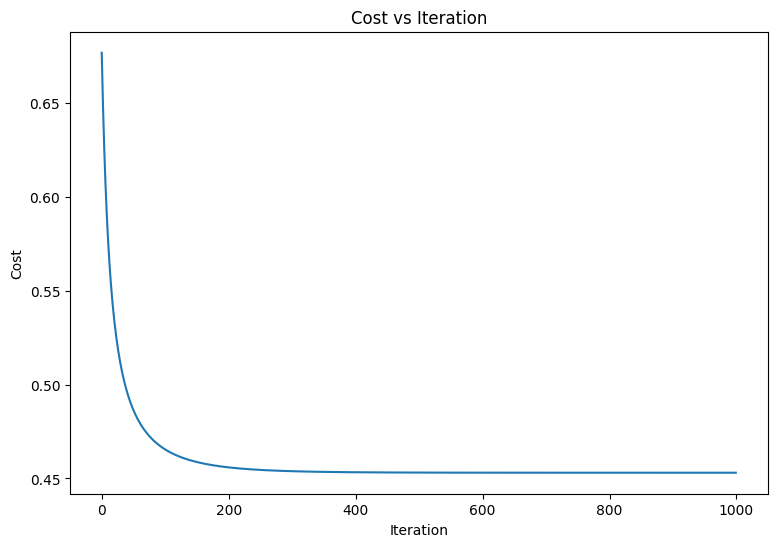

In [13]:
plt.figure(figsize=(9,6))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()



In [14]:
train_cost = costfunction_logreg(X_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(X_test_scaled, y_test, w, b)

print(f"Train Loss: {train_cost:.4f}")
print(f"Test Loss: {test_cost:.4f}")


Train Loss: 0.4531
Test Loss: 0.5146


In [15]:
y_test_pred = prediction(X_test_scaled, w, b)
accuracy = np.mean(y_test_pred == y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 70.78%


In [20]:
def evaluate_classification(y_true, y_pred):
    import numpy as np

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    return confusion_matrix, precision, recall, f1_score


In [21]:
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)

print("Confusion Matrix:\n", confusion_matrix)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")


Confusion Matrix:
 [[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-score: 0.55
